**Artificial Inteligence (CS550)**
<br>
Date: **12 February 2020**
<br>
Location: **SU, NEW STEM building**
<br>
Room: **304**

Title: **Seminar №4**
<br>
Speaker: **Dr. Shota Tsiskaridze**

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

<h2 align="center">Gradient Descent</h2>



<h3 align="center">Cost Function</h3>

**Gradient Descent**:
- is an iterative optimization algorithm for finding minimum of the **convex function**.
- relies on properties of the first-derivative to find in what direction and with what magnitude coefficients of the function should be modified.
- is the backbone of an machine learning algorithm. 

Let's assume that we have some linear data with some random Gaussian noise:

$$y = \theta_0 + \theta_1 \cdot x + x_{noise}.$$

In [2]:
# Importing the required Libraries

import numpy as np
import matplotlib.pyplot as plt

In [3]:
a = 0                                  # left border of an interval  [a,b]
b = 2                                 # right border of an interval [a,b]
X = (b-a) * np.random.rand(100, 1) + a  # generates 100 events on interval [0,10]

theta_0 = 4
theta_1 = 3
y = theta_0 + theta_1 * X + np.random.randn(100,1)   # generates the y with Gaussian noise

[0, 2, 0, 12.80569134102109]

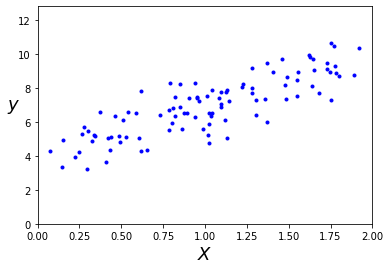

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, b-a, 0, np.max(y)*1.2])

<h3 align="center">Analytical Solution</h3>

One can find $\theta_0$ and $\theta_1$ analytically, by simply solving the system of equations:

$$\left.\begin{matrix}
y_1 = \theta_0 + \theta_1 x_1\\
y_2 = \theta_0 + \theta_1 x_2\\ 
\cdots\\ 
y_m = \theta_0 + \theta_1 x_m
\end{matrix}\right\}
\Rightarrow
\begin{bmatrix}
y_1\\
y_2\\
\cdots \\
y_m
\end{bmatrix}
= \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\ 
\cdots & \cdots \\
1 & x_m
\end{bmatrix}
\cdot
\begin{bmatrix}
\theta_0\\
\theta_1
\end{bmatrix}
\Rightarrow
\overrightarrow{y}= X_+ \cdot \overrightarrow{\theta}
\Rightarrow
X_+^T \cdot \overrightarrow{y} = X_+^T \cdot X_+ \cdot \overrightarrow{\theta}
\Rightarrow
\left ( X_+^T \cdot X_+ \right )^{-1}\cdot X_+^T \overrightarrow{y} = \overrightarrow{\theta}
,$$

where $m$ is the number of observations. In our case $m = 100$.

In [5]:
X_plus = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv( (X_plus.T).dot(X_plus) ).dot(X_plus.T).dot(y)
print(theta_best)

[[3.94629081]
 [2.96917216]]


As we can see, the 
$\theta_{best}= \begin{bmatrix}
3.90452816\\
3.01263553
\end{bmatrix}
$ is close to 
$\theta_{real} = 
\begin{bmatrix}
4\\
3
\end{bmatrix}
$.
 It cannot be accurate due to the noise we have introduced in data.

In [6]:
X_new = np.array([[0], [10]])
X_new_plus = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_plus.dot(theta_best)
y_predict

array([[ 3.94629081],
       [33.63801242]])

[0, 2, 0, 12.80569134102109]

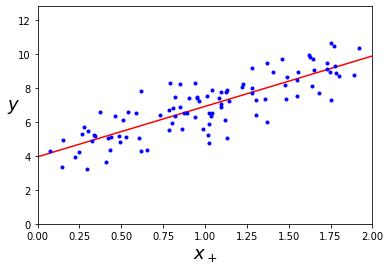

In [7]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel("$x_+$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, b-a, 0, np.max(y)*1.2])


<h3 align="center">Loss Function and Gradients</h3>

**Loss function**:
- A **loss function** or **cost function** is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event.

- Let’s take **Mean Squared Error** (**MSE**) function, which is widely used as a **loss Function** for **linear regression** models.

  $$MSE: \text{ } L(\overrightarrow{\theta}) =  \frac{1}{2m}\sum_{i=1}^{m} (\hat{y}_i - y_i)^2,$$
  
  where:
 - $i$ - index of sample;
 - $\hat{y}$ - predicted value;
 - $y$ - expected value;
 - $m$ - number of observables.

**Gradient Function**:
$$\nabla{L(\overrightarrow{\theta})} = \frac{1}{m}\sum_{i=1}^{m} (\hat{y}_i - y_i)^2 \cdot \overrightarrow{\theta},$$

or in expanded form for $j = \overline{1, m}$:

$$\frac{\partial L({\overrightarrow{\theta}})}{\partial {\theta_j}} = \frac{1}{m}\sum_{i=1}^{m} (\hat{y}_i - y_i)^2 \cdot \theta_j.$$

**Update rule**:
- To update model parameters, so the convergence is achieved, the following math has to be iteratively applied to each $\overrightarrow{\theta}$:

  $$\overrightarrow{\theta}' = \overrightarrow{\theta} - \alpha \cdot \nabla{L(\overrightarrow{\theta})},$$
  
  or in expanded form for $j = \overline{1, m}$:
  
  $${\theta_j}' = \theta_j - \alpha \cdot \frac{1}{m}\sum_{i=1}^{m} (\hat{y}_i - y_i) \cdot \theta_j.,$$

  where:
 - ${\theta_j}'$ - new weight value;
 - $\theta_j$ — current weight value;
 - $\alpha$ — learning rate;
 - $\frac{\partial L(\overrightarrow{\theta})}{\partial \theta_j}$ - partial derivative of $L$ with respect to $\theta_j$.


In [8]:
# The Loss Function that calculates the loss for a given X, y and theta.
# Input: X, y, theta
# Output: L(theta)

def  L(X, y, theta): 
    
    m = len(y)
    predictions = X.dot(theta)
    
    # loss = (1/m) * np.sum(np.abs(predictions-y)) #MAE:Mean Absolute Error
    L = (1/2*m) * np.sum(np.square(predictions-y)) #MSE: Mean Squared Error
    # loss = np.sqrt((1/m) * np.sum(np.square(predictions-y))) #RMSE: Root Mean Squared Error
    return L


In [9]:
# Derivative of the loss Function that calculates the loss for a given X, y and theta.
# Input: X, y, theta
# Output: dL(theta)

def  DL(X, y, theta): 
    
    m = len(y)
    prediction = np.dot(X, theta)
        
    DL = (1/m)*( X.T.dot((prediction - y)))

    return DL


In [10]:
# Gradient Decent method that returs the final theta vector and an array of loss history over number of iterations

def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):

    m = len(y)
    L_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    
    for i in range(iterations):
               
        theta = theta - learning_rate * DL(X, y, theta)
        theta_history[i,:] = theta.T
        L_history[i]  = L(X, y, theta)
        
    return theta, L_history, theta_history


<h4>Let's start with some random $\overrightarrow{\theta}$ from a Gaussian distribution, a learning rate of $\alpha = 0.01$ and $1000$ iterations.</h4>

In [11]:
learning_rate = 0.01
iterations    = 1000

theta = np.random.randn(2,1)

X_plus = np.c_[np.ones((len(X),1)),X]

theta, L_history, theta_history = gradient_descent(X_plus,y,theta,learning_rate,iterations)

print('Theta0:      {:0.3f},\nTheta1:      {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final loss:  {:0.3f}'                               .format(L_history[-1]))

Theta0:      3.560,
Theta1:      3.309
Final loss:  4707.962


<h4>Let's plot the $L_{history}$ over iterations</h4>

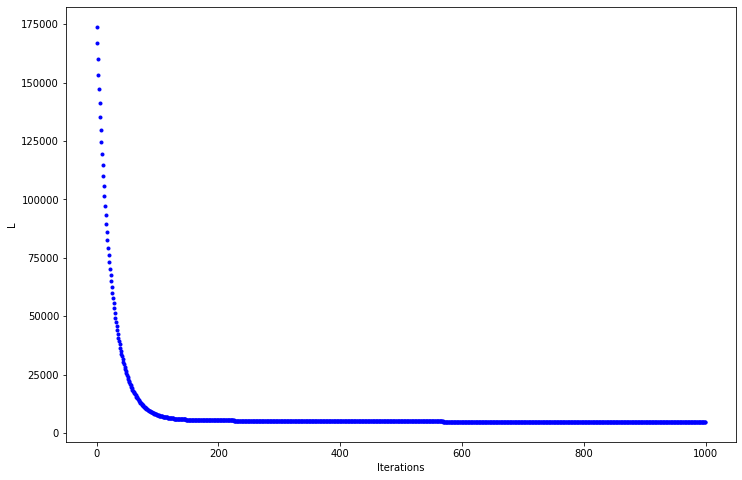

In [12]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('L')
ax.set_xlabel('Iterations')
ax.plot(range(iterations), L_history,'b.')

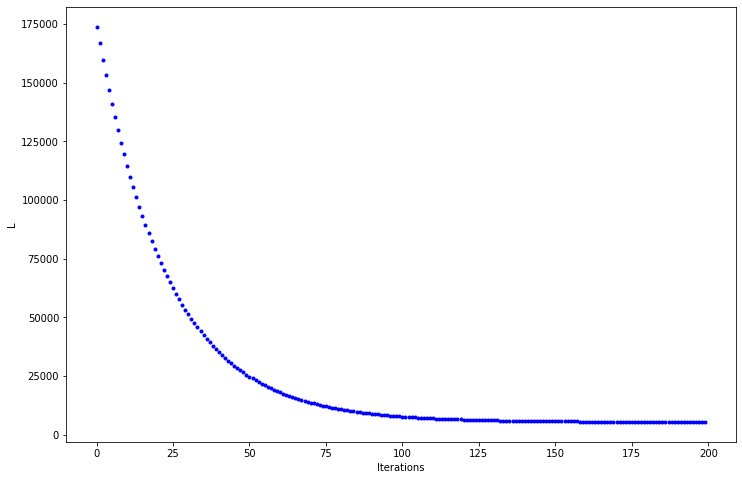

In [13]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('L')
ax.set_xlabel('Iterations')
ax.plot(range(200), L_history[:200],'b.')

<h4 >After around $150$ iterations the loss is flat so the remaining iterations will not result in any further optimization</h4>

<h4>Let us build a function which can show the effects together and also show how gradient decent actually is working</h4>

In [14]:
# Plots the graphs for different iterations and learning rates combination

def plot_GD(learning_rate, iterations, ax, ax1=None):

     ax.plot(X, y, 'b.')
     theta = np.random.randn(2,1)

     tr = 0.1
     L_history = np.zeros(iterations)
     for i in range(iterations):
        pred_prev = X_plus.dot(theta)
        theta,h,_ = gradient_descent(X_plus, y, theta, learning_rate,1)
        pred = X_plus.dot(theta)

        L_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X, pred,'r-', alpha = tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        ax1.plot(range(iterations), L_history,'b.')  

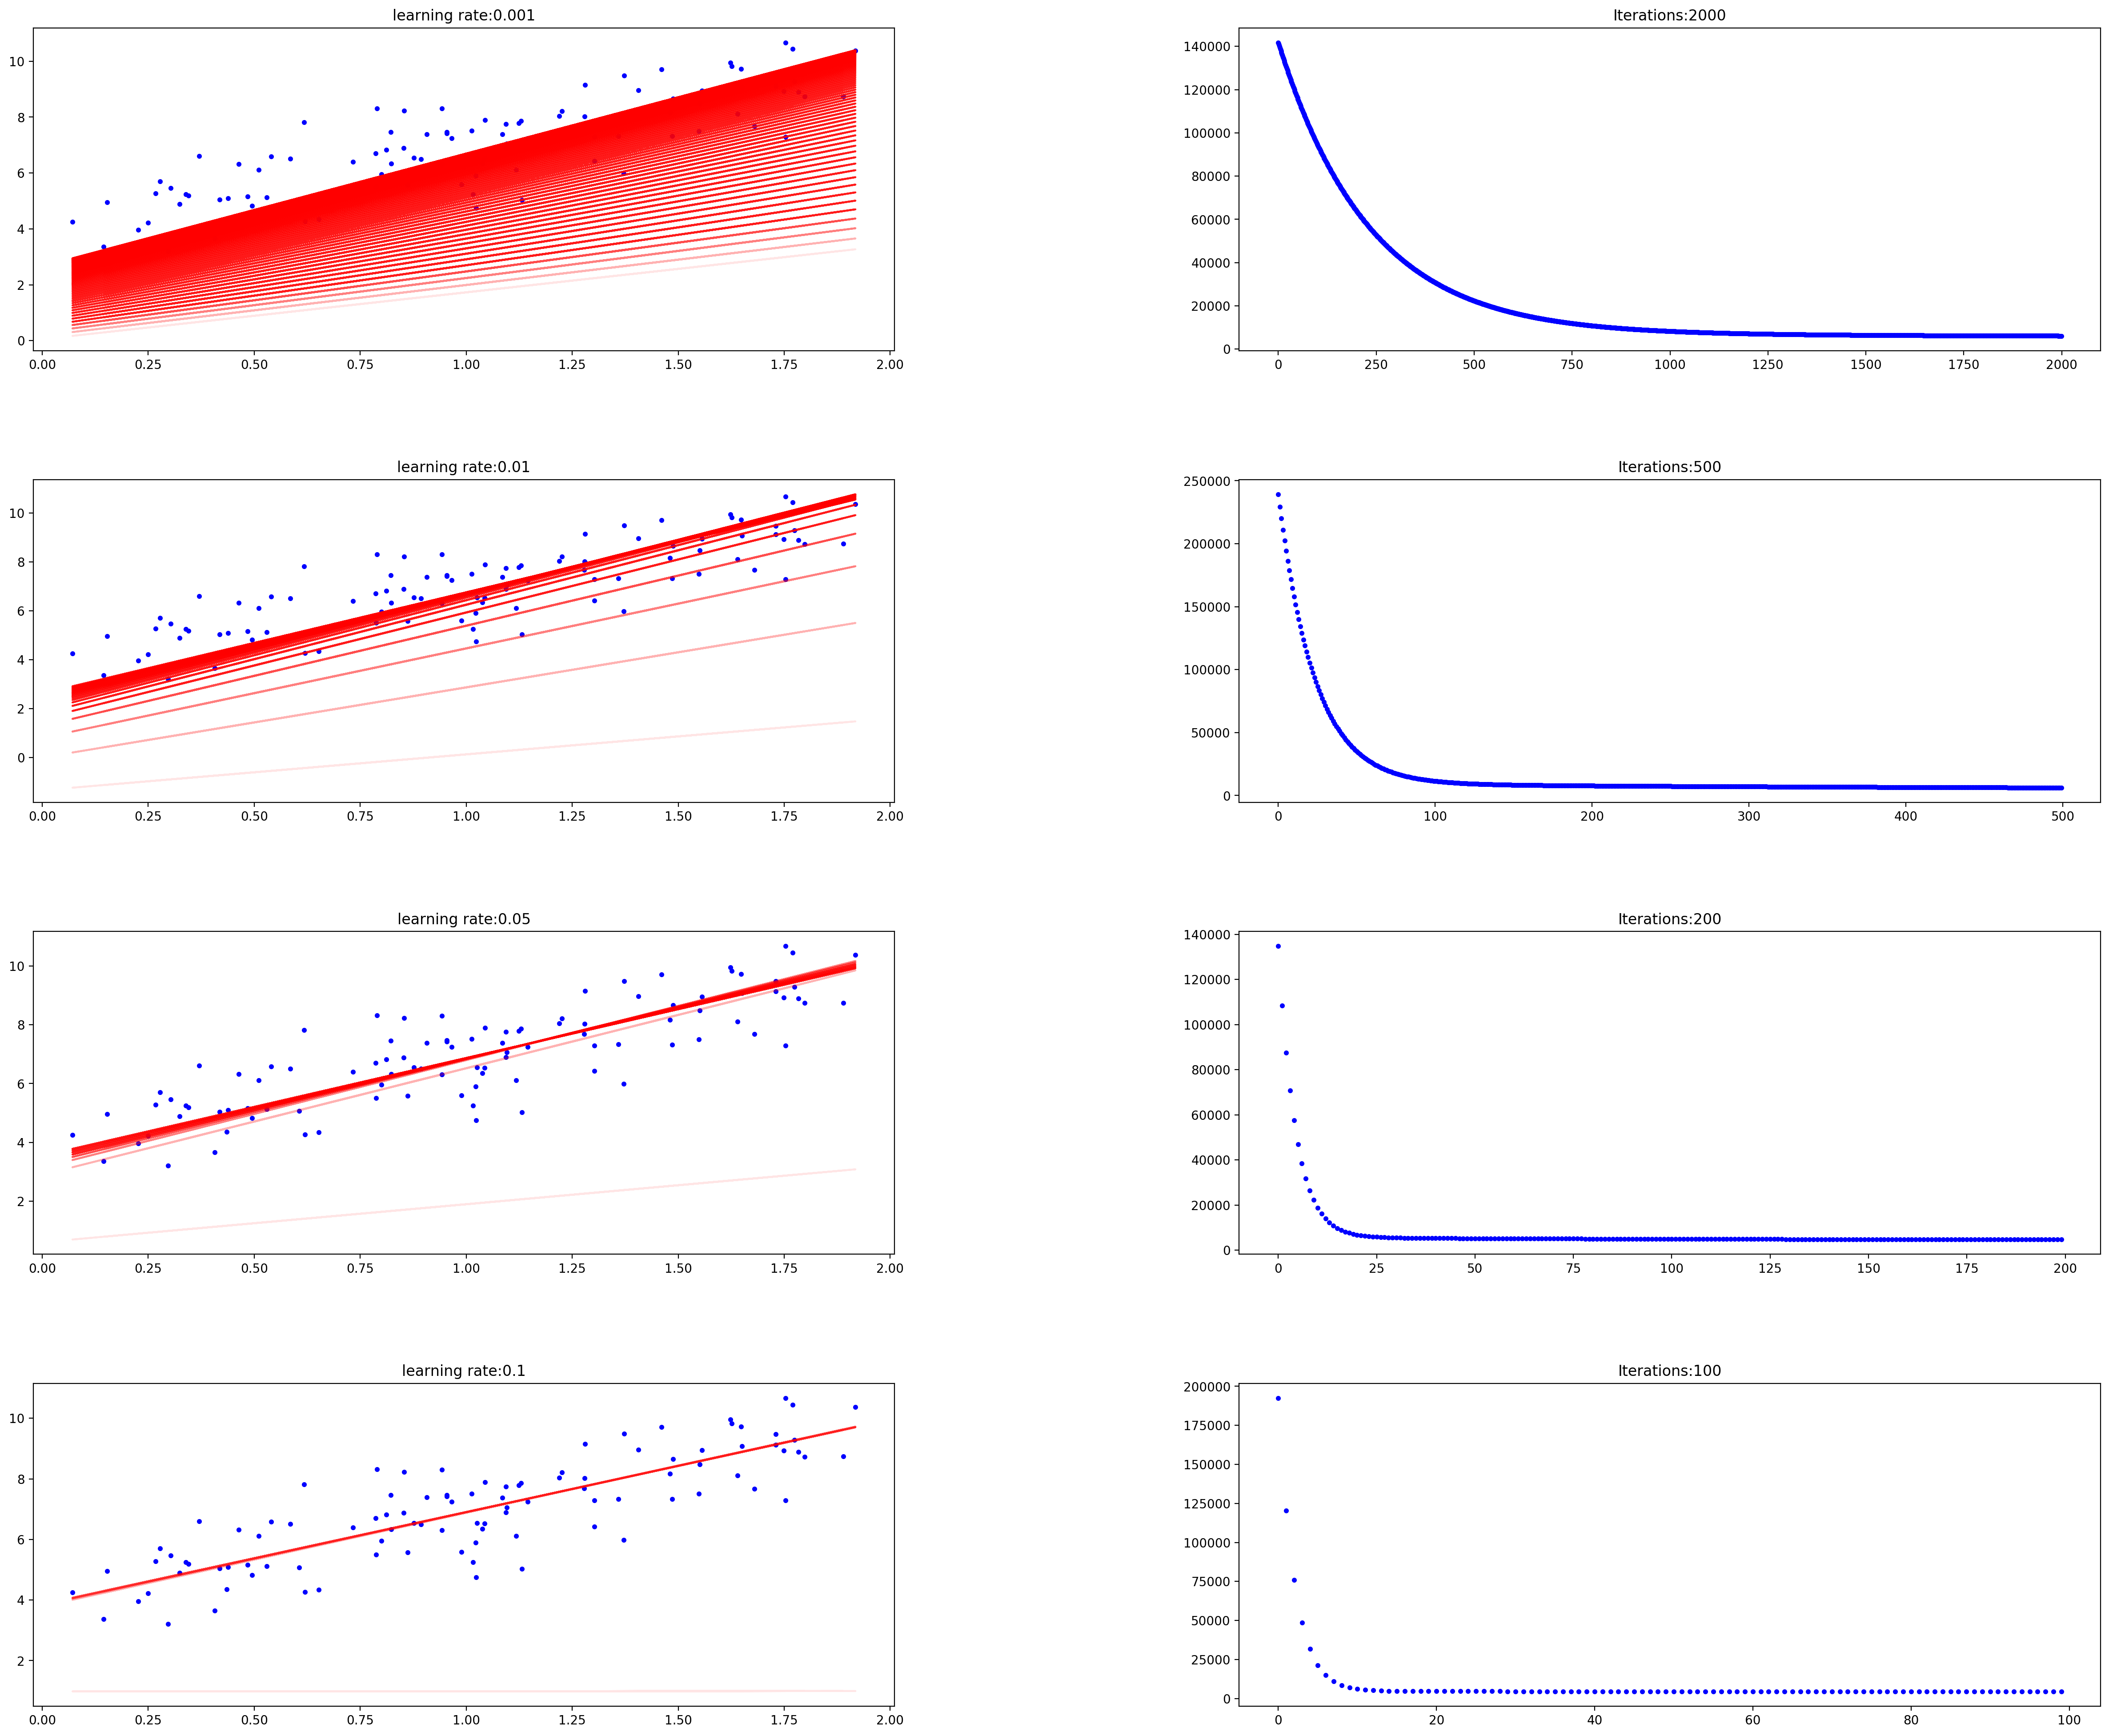

In [23]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

lr =[(2000, 0.001), (500, 0.01), (200, 0.05), (100, 0.1)]
count =0
for iterations, learning_rate in lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("learning rate:{}".format(learning_rate))
    ax1.set_title("Iterations:{}".format(iterations))
    plot_GD(learning_rate, iterations, ax, ax1)
    

<h3 align="center">Stochastic Gradient Descent (SGD)</h3>

- In our **gradient descent** method we did the gradients on each observation one by one;
- In **stochastic gradient descent** we can chose the **random** observations **randomly**; 
- It is called stochastic because **samples are selected randomly** (or shuffled) instead of as a **single group** (as in standard gradient descent).

In [16]:
# Stochastic Gradient Decent method that returs the final theta vector and an array of loss history over number of iterations

def stocashtic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10):

    m = len(y)
    L_history = np.zeros(iterations)
    
    for i in range(iterations):
        loss = 0.0
        for j in range(m):
            rand_ind = np.random.randint(0, m)
            X_j = X[rand_ind,:].reshape(1,X.shape[1])
            y_j = y[rand_ind].reshape(1,1)

            prediction = np.dot(X_j,theta)

            theta = theta - learning_rate * DL(X_j, y_j, theta)
#            theta = theta -(1/m)*learning_rate*( X_j.T.dot((prediction - y_j)))

            loss += L(X_j, y_j, theta)

        L_history[i]  = loss
        
    return theta, L_history

In [17]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):

    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += L(X_i,y_i, theta)
        cost_history[it]  = cost
        
    return theta, cost_history

In [18]:
learning_rate = 0.1
iterations    = 100

theta = np.random.randn(2,1)

X_plus = np.c_[np.ones((len(X),1)),X]
theta, L_history = stocashtic_gradient_descent(X_plus, y, theta, learning_rate, iterations)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'                           .format(L_history[-1]))

Theta0:          3.965,
Theta1:          2.971
Final cost/MSE:  40.753


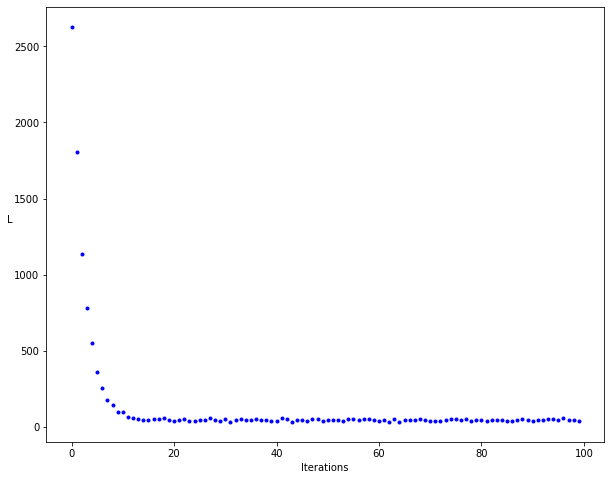

In [19]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('L',rotation=0)
ax.set_xlabel('Iterations')
theta = np.random.randn(2,1)

ax.plot(range(iterations), L_history,'b.')

<h3 align="center">Mini Batch Gradient Descent</h3>


- **Mini Batch Gradient Descent** uses random samples but in **batches**;
- We do not calculate the gradients for **each observation** but for a **group of observations** which results in a faster optimization;
- A simple way to implement is to shuffle the observations and then create batches and then proceed with gradient descent using batches;
- **In actual practice** we use an approach **Mini batch gradient descent**.

In [20]:
# Mini Batch Gradient Decent method that returs the final theta vector and an array of loss history over number of iterations


def minibatch_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10, batch_size=20):

    m = len(y)
    L_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for i in range(iterations):
        loss =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for j in range(0,m,batch_size):
            X_j = X[j:j+batch_size]
            y_j = y[j:j+batch_size]
            
            X_j = np.c_[np.ones(len(X_j)),X_j]            
            theta = theta -learning_rate*DL(X_j, y_j, theta)
            loss += L(X_j,y_j, theta)
        L_history[i]  = loss
        
    return theta, L_history

In [21]:
learning_rate = 0.1
iterations    = 100

theta = np.random.randn(2,1)


theta, L_history = minibatch_gradient_descent(X, y, theta, learning_rate, iterations)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0], theta[1][0]))
print('Final cost/MSE:  {:0.3f}'                           .format(L_history[-1]))

Theta0:          3.943,
Theta1:          2.970
Final cost/MSE:  906.443


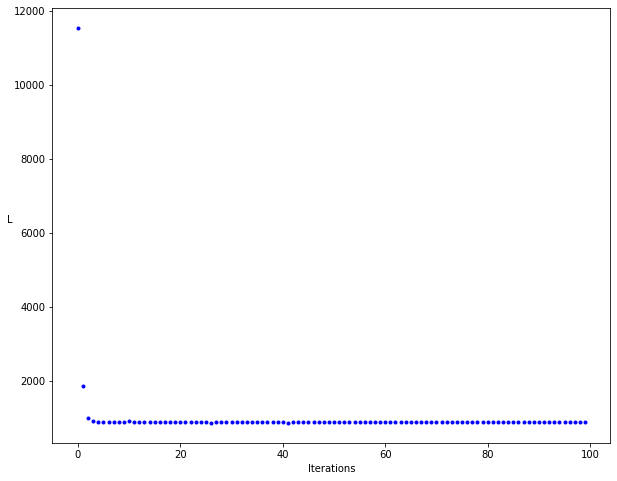

In [22]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('L', rotation=0)
ax.set_xlabel('Iterations')
theta = np.random.randn(2, 1)

ax.plot(range(iterations), L_history, 'b.')